<a href="https://colab.research.google.com/github/scottspurlock/csc401-2021s/blob/main/labs/lab04_srs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4 KNN
## Scott Spurlock
### 2/22/2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
file_link = 'https://drive.google.com/uc?export=download&id=1872WZovmmIRvyAra5AENBfUuVetA77ag'
df = pd.read_csv(file_link)
df.head(6)

,ID,Textbook,Videos,Lecture,Discussion,Problems,Proactive,CodeExperience,MotivatedByFun,MotivatedByChallenge,MotivatedByGrades,MotivatedByJob,Grade
0,1,3,4,3,1,2,4,1,4,3,4,4,D
1,2,2,3,5,4,3,5,1,4,4,4,4,B
2,3,4,5,5,3,5,3,1,5,4,5,5,C
3,4,1,5,3,4,3,1,1,4,3,1,3,F
4,5,4,3,3,2,2,4,2,5,4,5,5,B
5,6,2,3,4,3,4,3,1,4,4,4,3,D


In [3]:
df['Grade'].value_counts()

B    18
C    16
D     9
A     8
F     4
Name: Grade, dtype: int64

In [4]:
# Convert the numeric data into a numpy array
X = df[df.columns[1:-1]].values
print('data:', X.shape)
print(X)

# Convert the class labels into numbers
y = df['Grade'].astype('category').cat.codes.values
print('\nlabels:', y.shape)
y

data: (55, 11)
[[3 4 3 1 2 4 1 4 3 4 4]
 [2 3 5 4 3 5 1 4 4 4 4]
 [4 5 5 3 5 3 1 5 4 5 5]
 [1 5 3 4 3 1 1 4 3 1 3]
 [4 3 3 2 2 4 2 5 4 5 5]
 [2 3 4 3 4 3 1 4 4 4 3]
 [2 4 3 5 2 5 1 5 4 3 4]
 [3 2 1 2 3 3 1 3 3 2 2]
 [3 4 4 5 3 4 1 5 5 5 5]
 [3 3 4 4 1 5 2 5 3 5 5]
 [2 4 3 4 3 4 1 5 4 4 4]
 [2 3 4 3 2 4 2 3 3 3 2]
 [3 4 4 4 3 5 2 5 5 4 3]
 [5 4 5 2 3 5 1 5 4 5 5]
 [3 3 3 3 3 2 1 3 2 3 3]
 [3 5 5 4 4 3 1 5 5 5 3]
 [4 5 5 3 5 5 1 5 4 5 4]
 [2 5 3 4 2 4 1 4 5 4 4]
 [3 4 4 2 1 2 2 4 2 3 2]
 [1 4 5 5 4 4 2 5 4 5 5]
 [1 4 2 3 5 2 5 5 5 4 5]
 [4 5 4 4 2 2 2 5 3 3 5]
 [2 3 4 2 4 5 4 5 5 5 4]
 [4 3 4 5 2 5 1 5 3 5 4]
 [2 3 1 3 3 3 1 4 3 3 4]
 [3 5 2 5 3 5 4 5 4 5 4]
 [3 4 3 4 4 3 1 4 4 4 4]
 [4 4 1 4 4 3 1 5 3 2 5]
 [2 5 2 4 4 1 3 4 4 5 4]
 [2 5 4 3 4 3 1 5 4 5 4]
 [3 4 2 3 5 3 2 5 5 3 4]
 [1 5 3 5 5 3 2 5 4 4 4]
 [4 4 3 5 5 5 4 5 4 4 4]
 [4 4 3 2 4 1 1 5 5 5 4]
 [2 4 2 4 4 4 4 4 4 2 3]
 [1 5 2 3 5 4 1 5 2 5 5]
 [2 4 4 3 1 4 1 5 3 4 5]
 [3 4 2 4 5 3 1 5 4 3 4]
 [2 4 3 4 3 2 2 4 3 3 4]
 [4 4 5 3 

array([3, 1, 2, 4, 1, 3, 1, 4, 1, 1, 2, 1, 1, 1, 4, 2, 1, 2, 3, 1, 0, 1,
       0, 1, 3, 0, 2, 2, 1, 2, 1, 1, 0, 4, 0, 2, 2, 2, 2, 2, 1, 1, 3, 3,
       2, 3, 2, 0, 3, 1, 0, 0, 2, 3, 2], dtype=int8)

## Split out train/test sets

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=0)
print('Xtrain.shape:', Xtrain.shape)
print('ytrain.shape:', ytrain.shape)
print('Xtest.shape:', Xtest.shape)
print('ytest.shape:', ytest.shape)

Xtrain.shape: (27, 11)
ytrain.shape: (27,)
Xtest.shape: (28, 11)
ytest.shape: (28,)


In [6]:
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
model.fit(Xtrain, ytrain)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [7]:
preds = model.predict(Xtest)
accuracy_score(ytest, preds)


0.39285714285714285

## Testing a range of values for K using a loop

In [8]:
k_vals = np.arange(1, 21)
acc_vals = []

for k in k_vals:
  model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  model.fit(Xtrain, ytrain)
  preds = model.predict(Xtest)
  acc = accuracy_score(ytest, preds)
  acc_vals.append(acc)
  print('K = {:02d}: Acc = {:.2f}'.format(k, acc))

best_idx = np.argmax(acc_vals)
best_k = k_vals[best_idx]
print('Best k =', best_k)

K = 01: Acc = 0.39
K = 02: Acc = 0.54
K = 03: Acc = 0.39
K = 04: Acc = 0.43
K = 05: Acc = 0.43
K = 06: Acc = 0.46
K = 07: Acc = 0.29
K = 08: Acc = 0.29
K = 09: Acc = 0.39
K = 10: Acc = 0.32
K = 11: Acc = 0.29
K = 12: Acc = 0.21
K = 13: Acc = 0.21
K = 14: Acc = 0.25
K = 15: Acc = 0.29
K = 16: Acc = 0.29
K = 17: Acc = 0.25
K = 18: Acc = 0.21
K = 19: Acc = 0.25
K = 20: Acc = 0.25
Best k = 2


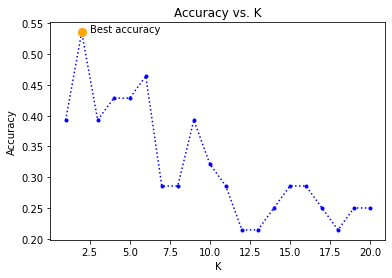

In [9]:
plt.plot(k_vals, acc_vals, '.b:')
plt.plot(k_vals[best_idx], acc_vals[best_idx], 'o', color='orange', markerSize=8)
plt.annotate('Best accuracy', (k_vals[best_idx], acc_vals[best_idx]), (k_vals[best_idx] + 0.5, acc_vals[best_idx]))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K')
plt.show()

## Show accuracy and a confusion matrix for the best K value.

In [10]:
model = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
model.fit(Xtrain, ytrain)
preds = model.predict(Xtest)
acc = accuracy_score(ytest, preds)
print('Best accuracy:', acc)

Best accuracy: 0.5357142857142857


[[4 0 0 0 0]
 [1 5 1 0 0]
 [0 3 6 1 0]
 [0 0 4 0 0]
 [0 0 2 1 0]]


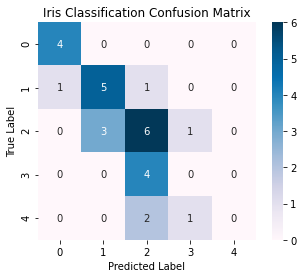

In [11]:
cm = confusion_matrix(ytest, preds)
print(cm)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="PuBu",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Iris Classification Confusion Matrix')
plt.show()

## In a text cell, answer these questions:
- Is your accuracy good? How does it compare to random chance?
  - Since there are 5 possible values for the target value, random chance would be 20%. So, an accuracy of 54% is actually pretty good.
- Based on the confusion matrix, what is your model best/worst at?
  - The model is good at class 0 (A), correctly predicting every actual example. It also incorrectly predicts 0 once when the actual label is 1.
  - The model is not good at predicting classes 3 and 4, which are always incorrect.

--------------------------
# Challenges
Try using a regression model to predict grade.

In [12]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=4, metric='euclidean')
model.fit(Xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [13]:
preds = model.predict(Xtest)
preds

array([2.25, 2.75, 1.5 , 2.5 , 2.25, 1.25, 0.25, 2.25, 2.5 , 2.  , 1.75,
       2.  , 1.25, 0.5 , 1.5 , 1.75, 2.75, 3.  , 2.75, 2.25, 2.5 , 0.25,
       2.  , 1.75, 0.75, 1.25, 2.  , 2.  ])

In [14]:
error = np.abs(preds - ytest)
error

array([0.75, 1.25, 0.5 , 0.5 , 1.25, 0.75, 0.25, 0.75, 0.5 , 1.  , 0.75,
       0.  , 0.25, 0.5 , 0.5 , 0.75, 0.75, 1.  , 1.25, 0.25, 0.5 , 0.25,
       1.  , 0.25, 0.75, 0.75, 1.  , 0.  ])

In [15]:
# Mean Absolute Error
mae = error.mean()
mae

0.6428571428571429